# MAT281 - Tarea 2

**Indicaciones**:

* En los **Ejercicio 1-8** puedes utilizar tanto `matplotlib` como `altair` según te parezca más conveniente o cómodo, en ambos casos cada gráfico debe tener elementos mínimos como:
    - Título
    - Nombre de los ejes, leyendas, etc. en formato _amigable_/_humano_, por ejemplo, si la columna del dataframe en cuestión tiene por nombre `casos_confirmados` se espera que el eje del gráfico tenga por nombre `Casos confirmados`.
    - Colores adecuados al tipo de datos.
    - Un tamaño adecuado para ver con facilidad en una pantalla con resolución HD o FullHD.
    - Cada vez que no se cumplan alguna de estos requerimientos se descontará __1 punto__ de la nota final.

* Para el **Ejercicio 9** es obligación utilizar `altair`.
* Cada ejercicio debe estar acompañado con una celda con comentarios o análisis que puedas desprender de los gráficos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets

from datetime import date
from ipywidgets import interactive, interact

pd.set_option('display.max_columns', 999)
alt.data_transformers.enable('data_server')
alt.themes.enable('opaque')

%matplotlib inline

**COVID-19 en Chile** 

En esta tarea exploraremos los datos de Covid-19 en Chile a profundidad. Las siguientes celdas cargarán los datos a utilizar en tu sesión. Es importante que leas la documentación de cada conjunto de datos para comprender las columnas.

In [2]:
start_date = pd.to_datetime("2020-04-13")

In [3]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto6
# Set de 2 archivos, en formato CSV y JSON, que dan cuenta de la tasa de incidencia acumulada y los casos confirmados acumulados en cada una de las comunas de Chile, 
# según residencia, conforme a los informes epidemiológicos publicados por el Ministerio de Salud del país. Esto es una mejora derivada del producto 2, al colocar varios 
# archivos de aquel producto en un solo archivo.
# Se entiende por tasa de incidencia acumulada el número total de casos acumulados en relación a la población susceptible de enfermar en un período determinado.
confirmados = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto6/bulk/data.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
    .dropna()
    .astype({"casos_confirmados": np.float, "tasa": np.float})
)

confirmados

,poblacion,casos_confirmados,fecha,region_id,region,provincia_id,provincia,comuna_id,comuna,tasa
0,247552.0,270.0,2020-04-27,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,109.067994
1,247552.0,9138.0,2020-10-12,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,3691.345657
2,247552.0,596.0,2020-05-29,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,240.757497
3,247552.0,6131.0,2020-08-17,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,2476.651370
4,247552.0,353.0,2020-05-11,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,142.596303
...,...,...,...,...,...,...,...,...,...,...
25986,1021.0,1.0,2020-05-08,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,97.943193
25987,1021.0,3.0,2020-11-20,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,293.829579
25988,1021.0,1.0,2020-07-10,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,97.943193
25989,1021.0,0.0,2020-09-11,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,0.000000


In [4]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto19
# Archivo que da cuenta del número de casos confirmados activos notificados en cada una de las comunas de Chile, según residencia, y concatena la historia de 
# los informes epidemiológicos publicados por el Ministerio de Salud del país.
# Se entiende por caso confirmado activo a la persona viva que cumple con los criterios de definición de casos sospechoso con una muestra positiva de SARS-CoV-2, 
# cuya fecha de inicio de síntomas en la notificación es menor o igual a 11 días a la fecha del reporte actual (considera solo vivos).

activos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto19/CasosActivosPorComuna.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .loc[lambda x: x["codigo_comuna"].notnull()]
    .melt(id_vars=["region", "codigo_region", "comuna", "codigo_comuna", "poblacion"], var_name="fecha", value_name="casos_activos")
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
)

activos

,region,codigo_region,comuna,codigo_comuna,poblacion,fecha,casos_activos
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-04-13,88.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-04-13,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-04-13,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-04-13,0.0
4,Tarapaca,1,Alto Hospicio,1107.0,129999.0,2020-04-13,8.0
...,...,...,...,...,...,...,...
22831,Magallanes y la Antartica,12,Punta Arenas,12101.0,141984.0,2020-11-27,438.0
22832,Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,2020-11-27,0.0
22833,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,2020-11-27,0.0
22834,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,2020-11-27,0.0


In [5]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto14
# El archivo FallecidosCumulativo.csv contiene la columna ‘Región’, seguida por columnas correspondientes a ‘[Fecha]’. Estas últimas columnas, ‘[Fecha]’, 
# indican el número de fallecidos acumulativo, por región, desde el 22-03-2020 hasta la fecha.

fallecidos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["region"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos

,region,fecha,fallecidos
374,Arica y Parinacota,2020-04-13,1.0
375,Tarapacá,2020-04-13,0.0
376,Antofagasta,2020-04-13,1.0
377,Atacama,2020-04-13,0.0
378,Coquimbo,2020-04-13,0.0
...,...,...,...
4313,Los Ríos,2020-11-30,55.0
4314,Los Lagos,2020-11-30,203.0
4315,Aysén,2020-11-30,14.0
4316,Magallanes,2020-11-30,194.0


In [6]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto10
# acumulado
fallecidos_etareo = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["grupo_de_edad"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
        grupo_de_edad=lambda x: x["grupo_de_edad"].str.replace("<=39", "0-39")
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos_etareo

,grupo_de_edad,fecha,fallecidos
28,0-39,2020-04-13,3
29,40-49,2020-04-13,2
30,50-59,2020-04-13,3
31,60-69,2020-04-13,12
32,70-79,2020-04-13,29
...,...,...,...
1647,50-59,2020-11-30,1546
1648,60-69,2020-11-30,3250
1649,70-79,2020-11-30,4329
1650,80-89,2020-11-30,3983


## Ejercicio 1

(10 puntos)

Mostrar cantidad de fallecidos a la fecha por cada grupo etáreo.

/home/cloe/miniconda3/envs/mat281/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


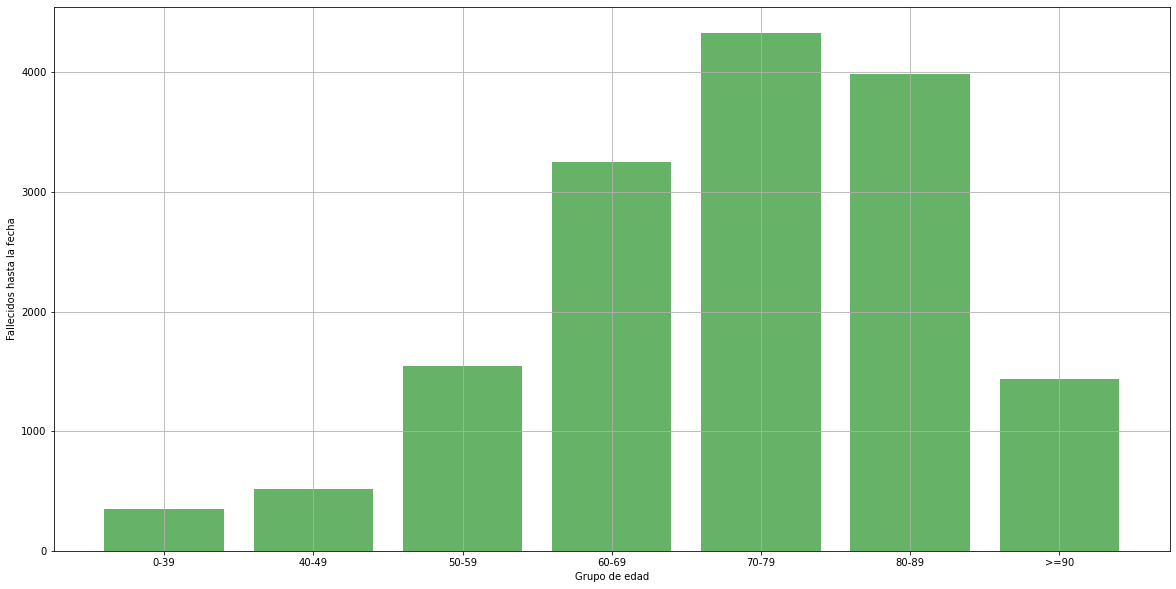

In [7]:
x=fallecidos_etareo.tail(7)["grupo_de_edad"].values
y=fallecidos_etareo.tail(7)["fallecidos"].values

fig=plt.figure(figsize=(20, 10))

plt.bar(x, y, align='center', color="g", alpha=0.6)
#plt.xticks(x, y)
plt.xlabel('Grupo de edad')
plt.ylabel('Fallecidos hasta la fecha')
plt.grid()

fig.show();

In [8]:
source = pd.DataFrame({'Grupo de edad':fallecidos_etareo.tail(7)["grupo_de_edad"].values,
              'Fallecidos hasta la fecha':fallecidos_etareo.tail(7)["fallecidos"].values})

barra=alt.Chart(source).mark_bar(color='green',opacity=0.7).encode(
    x=alt.X('Grupo de edad:O'),
    y='Fallecidos hasta la fecha:Q',
    tooltip=['Grupo de edad','Fallecidos hasta la fecha']
).properties(
    title= 'Cantidad de fallecidos hasta la fecha por edad',
    width=500,
    height=500
)

text = alt.Chart(source).mark_bar().encode(
    x='Grupo de edad',
    y='Fallecidos hasta la fecha',
    tooltip=['Grupo de edad','Fallecidos hasta la fecha']
).mark_text(baseline='middle').encode(
    text='Fallecidos hasta la fecha'
) 
barra+text

alt.LayerChart(...)

**Comentarios:** A partir de la gráfica podemos decir que las personas entre 60 y 89 años son las que en mayor cantidad la enfermedad les ha afectado fatalmente, por lo que podemos reafirmar que los adultos mayores son los que están en mayor riesgo ante la enfermedad, especialmente las que se encuentran entre los 70 y 79 años.

## Ejercicio 2

(10 puntos)

¿Qué tan variable es la población de las comunas de Chile? Considera utilizar un gráfico que resuma de buena forma la información sin agregar la variable de región o provincia.

In [9]:
comunas = activos.comuna.unique()
poblacion_comunas = []
for nom_comuna in activos.comuna.unique():
    poblacion_comunas.append(activos.loc[activos["comuna"] == nom_comuna]["poblacion"].unique()[0])
    
df = pd.concat([ pd.DataFrame({"comunas": comunas}), pd.DataFrame({"poblacion":poblacion_comunas}) ], axis=1)#.rename(columns= ["comunas", "poblacion"])df=     

In [21]:
puntos= alt.Chart(df).mark_circle().encode(
    x='comunas:N',
    y=alt.Y('poblacion:Q',
            axis=alt.Axis(title='Poblacion'))
).properties(
    width=1600,
    height=400
)

prom = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(poblacion):Q',
    size=alt.value(1)
).properties(
    width=2000,
    height=400
)

puntos+prom

alt.LayerChart(...)

**Comentarios:** RESPONDE AQUÍ

## Ejercicio 3

(10 puntos)

Mostrar evolución y comparación de los fallecimientos entre distintos grupos etáreos, pero que al mismo tiempo sea fácil identificar la cantidad de fallecidos total en cada fecha.

In [22]:
def calcular_diferencia(col):
    diferencia=[0]
    indices=col.index
    for x in range(1,len(indices)):
        diferencia.append(col[indices[x]]-col[indices[x-1]])
    return diferencia

In [23]:
total_fallecidos= pd.DataFrame(fallecidos_etareo.groupby("fecha")["fallecidos"].sum()).reset_index()
total_fallecidos.columns = ["Fecha", "Total fallecidos"]

fallecidos_etareo_mod = fallecidos_etareo.copy()
fallecidos_etareo_mod.columns = ["Grupo etario","Fecha", "Fallecidos"]

# prueba= pd.DataFrame(fallecidos_etareo_mod.groupby(["Grupo etario","Fecha"])["Fallecidos"].sum()).reset_index().assign(fallecidos_nuevos = (lambda df: df["Fallecidos"].transform(lambda col: calcular_diferencia(col))))
# prueba2= pd.DataFrame(prueba.groupby(["Grupo etario","Fecha"])["fallecidos_nuevos"].sum()).reset_index()

In [24]:
fallecidos_por_edad = alt.Chart(fallecidos_etareo_mod).mark_area(opacity=0.7).encode(
    x="Fecha:T",
    y=alt.Y("Fallecidos:Q"),
    color=alt.Color("Grupo etario:N", scale=alt.Scale(scheme='set1')),
    tooltip= ["Grupo etario:N","Fecha","Fallecidos"]
).properties(
    title="Fallecidos por grupo etario",
    width=1200,
    height=600
)

fallecidos_total = alt.Chart(total_fallecidos).mark_point(opacity=0).encode(
    x="Fecha:T",
    y=alt.Y("Total fallecidos:Q", title= "Fallecidos"),
    tooltip= ["Fecha","Total fallecidos"]
)

fallecidos_por_edad+fallecidos_total

alt.LayerChart(...)

In [15]:
# #prueba
# fallecidos_por_edad = alt.Chart(prueba).mark_area(opacity=0.7).encode(
#     x="Fecha:T",
#     y=alt.Y("fallecidos_nuevos:Q"),
#     color=alt.Color("Grupo etario:N", scale=alt.Scale(scheme='set1')),
#     tooltip= ["Grupo etario:N","Fecha","fallecidos_nuevos"]
# ).properties(
#     title="Fallecidos por grupo etario",
#     width=1200,
#     height=600
# )

# fallecidos_total = alt.Chart(prueba2).mark_point(opacity=0).encode(
#     x="Fecha:T",
#     y=alt.Y("fallecidos_nuevos:Q", title= "Fallecidos"),
#     tooltip= ["Fecha","fallecidos_nuevos"]
# )

# fallecidos_por_edad+fallecidos_total

**Comentarios:** Nuevamente se confirma que los adultos mayores son los que mueren en mayor cantidad por el virus, además se puede observar que desde Junio a mediados de Julio la cantidad de fallecidos total aumentó más rápido que en todo el periodo registrado, aún así la cantidad de muertos sigue en aumento.

## Ejercicio 4

(10 puntos)

Mostrar en tres gráficos la evolución de casos confirmados, evolución de fallecimientos y evolución de casos activos.

In [25]:
def calcular_diferencia(col):
    diferencia=[0]
    indices=col.index
    for x in range(1,len(indices)):
        diferencia.append(col[indices[x]]-col[indices[x-1]])
    return diferencia

In [26]:
casos_confirmados = pd.DataFrame(confirmados.groupby("fecha")["casos_confirmados"].sum()).reset_index().assign(casos_confirmados_nuevos = (lambda df: df["casos_confirmados"].transform(lambda col: calcular_diferencia(col))))

fallecimientos = pd.DataFrame(fallecidos.drop(fallecidos[fallecidos['region']=="Total"].index, axis=0).groupby("fecha")["fallecidos"].sum()).reset_index().assign(fallecidos_nuevos = (lambda df: df["fallecidos"].transform(lambda col: calcular_diferencia(col))))

casos_activos = pd.DataFrame(activos.groupby("fecha")["casos_activos"].sum()).reset_index()

In [27]:
#Casos confirmados
plot_confirmados = alt.Chart(casos_confirmados).mark_line().encode(
    x=alt.X("fecha:T", title= "Fecha"),
    y=alt.Y("casos_confirmados_nuevos", title= "Casos confirmados"),
    tooltip = "casos_confirmados_nuevos"
).properties(
    title="Evolución casos confirmados",
    width=1200,
    height=400
)    

In [28]:
#Fallecimientos
plot_fallecimientos = alt.Chart(fallecimientos).mark_line().encode(
    x=alt.X("fecha:T", title= "Fecha"),
    y=alt.Y("fallecidos_nuevos", title= "Fallecidos"),
    tooltip = "fallecidos_nuevos"
).properties(
    title="Evolución de fallecimientos",
    width=1200,
    height=400
) 

In [29]:
#Casos activos
plot_activos = alt.Chart(casos_activos).mark_line().encode(
    x=alt.X("fecha:T", title= "Fecha"),
    y=alt.Y("casos_activos", title= "Casos activos"),
    tooltip = "casos_activos"
).properties(
    title="Evolución de casos activos",
    width=1200,
    height=400
) 

In [30]:
alt.vconcat(
    plot_confirmados, 
    plot_fallecimientos, 
    plot_activos
).resolve_scale(
    x='shared'
)

alt.VConcatChart(...)

**Comentarios:** Comparando los gráficos anteriores podemos decir que los pick, hasta la fecha, de casos confirmados, fallecidos y casos avtivos se vivió durante Junio.

## Ejercicio 5

(10 puntos)

Comparar la tasa de incidencia entre las regiones a lo largo del tiempo.

In [36]:
df= confirmados.groupby(["region","fecha"])["tasa"].mean().reset_index()

In [35]:
alt.Chart(df).mark_line().encode(
    x=alt.X("fecha:T", title= "Fecha"),
    y=alt.Y("mean(tasa)", title= "Tasa promedio"),
    color=alt.Color("region:N", scale=alt.Scale(scheme='category20')),
    tooltip = "region"
).properties(
    title="Evolución tasa promedio por región",
    width=1200,
    height=400
)    

alt.Chart(...)

**Comentarios:** RESPONDE AQUÍ

## Ejercicio 6

(10 puntos)

¿Hay alguna conclusión que puedas obtener rápidamente al graficar un _scatter plot_ con los casos confirmados y tasa de incidencia de cada comuna para los días 13 de abril y 6 de noviembre del 2020? Además, colorea cada punto según la región a la que pertenece y considera si es útil en el gráfico que el tamaño sea proporcional a la población.

In [37]:
trece_abril = confirmados.loc[confirmados["fecha"]=="2020-04-13"]
seis_nov = confirmados.loc[confirmados["fecha"]=="2020-11-06"]

In [38]:
plot_abril=alt.Chart(trece_abril).mark_circle().encode(
    x=alt.X("casos_confirmados:Q", title= "Casos confirmados"),
    y=alt.Y("tasa:Q", title="Tasa de incidencia"),
    color=alt.Color("region:N", scale=alt.Scale(scheme='category20')),
    tooltip="comuna"
).properties(
    title="Tasa de incidencia v/s Casos confirmados el 13 de abril de 2020",
    width=500,
    height=500
)

plot_nov=alt.Chart(seis_nov).mark_circle().encode(
    x=alt.X("casos_confirmados:Q", title= "Casos confirmados"),
    y=alt.Y("tasa:Q", title="Tasa de incidencia"),
    color=alt.Color("region:N", scale=alt.Scale(scheme='category20')),
    tooltip="comuna"
).properties(
    title="Tasa de incidencia v/s Casos confirmados el 06 de noviembre de 2020",
    width=500,
    height=500
)

alt.hconcat(
    plot_abril, plot_nov
).resolve_scale(
    x='shared',
    y='shared'
)

alt.HConcatChart(...)

**Comentarios:** Rapidamente se puede notar que la tasa de incidencia y los casos confirmados en noviembre son mucho mayores.  

## Ejercicio 7

(10 puntos)

1. Grafica la evolución de los casos activos de cada comuna en un solo gráfico. 
2. Grafica la evolución de los casos activos de cada comuna en gráficos separados por región.

Entrega los pros y contras de cada uno de estos enfoques.

In [39]:
alt.Chart(activos).mark_line().encode(
    x=alt.X("fecha:T", title= "Fecha"),
    y=alt.Y("casos_activos", title= "Casos activos"),
    color=alt.Color('comuna:N', title="Comuna", scale=alt.Scale(scheme='rainbow')),
    tooltip = "comuna"
).properties(
    title="Evolución de casos activos por comuna",
    width=1200,
    height=400
) 

alt.Chart(...)

In [40]:
for reg in activos.region.unique():
    display(alt.Chart(activos.loc[ activos["region"] == reg]).mark_line(opacity=0.8).encode(
        x=alt.X("fecha:T", title= "Fecha"),
        y=alt.Y("casos_activos:Q", title= "Casos activos"),
        color=alt.Color('comuna:N', title="Comuna", scale=alt.Scale(scheme='rainbow')),
        tooltip=['comuna']
    ).properties(
        title=f"Evolución de casos activos por comuna en la Región {reg}",
        width=1200,
        height=400
    ))

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

**Comentarios:** 
1. Enfoque Nacional: Lo favorable es que se tiene una visión clara de los registros máximos a nivel país, se puede visualizar cuándo y en qué comuna se registró la cantidad de casos activos maxima, sin embargo el resto de los registros (casos activos < 800) difícilmente se pueden distinguir entre sí.
2. Enfoque regional: En este caso, es más facil visualizar y comparar los registros por región, sobre todo en regiones con pocas comunas, sin embargo en las que hay muchas el problema sigue siendo difícil diferenciar entre registros, además no es conveniente si es que se quiere realizar un análisis nacional.

## Ejercicio 8

(10 puntos)

Hacer un gráfico que permita comparar rápidamente entre regiones su promedio de casos activos , máximo de casos confirmados y fallecidos. Utiliza los valores reales y apoyarlos con colores.

Se adjunta el diccionario `region_names` con tal de reemplazar los nombres de las regiones en los datos `fallecidos` para poder unir con los otros datos. 

In [41]:
region_names = {
    "Araucanía": "La Araucanía",
    "La Araucania": "La Araucanía",
    "Aysén": "Aysén del General Carlos Ibáñez del Campo",
    "Aysen": "Aysén del General Carlos Ibáñez del Campo",
    "Magallanes": "Magallanes y de la Antártica Chilena",
    "Magallanes y la Antartica": "Magallanes y de la Antártica Chilena",
    "Metropolitana": "Metropolitana de Santiago",
    "O’Higgins": "Libertador General Bernardo O'Higgins",
    "Del Libertador General Bernardo O’Higgins": "Libertador General Bernardo O'Higgins",
    "Biobio": "Biobío",
    "Nuble":"Ñuble",
    "Los Rios": "Los Ríos",
    "Tarapaca": "Tarapacá", 
    "Valparaiso": "Valparaíso"
}

In [42]:
max_fallecidos = pd.DataFrame(fallecidos.drop(fallecidos[fallecidos["region"]=="Total"].index, axis=0).replace(region_names).groupby("region")["fallecidos"].max()).reset_index()
max_confirmados = pd.DataFrame(confirmados.replace(region_names).groupby("region")["casos_confirmados"].max()).reset_index()
prom_activos = pd.DataFrame(activos.replace(region_names).groupby("region")["casos_activos"].mean()).reset_index()

df=prom_activos.merge(max_confirmados, on = "region").merge(max_fallecidos, on = "region")

In [43]:
plot_casos_confirmados = alt.Chart(df).mark_circle(opacity=0.7).encode(
    x=alt.X("casos_activos", title="Promedio casos activos" ),
    y=alt.Y("casos_confirmados:Q", title="Máx. casos confirmados (puntos)"),
    color=alt.Color("region:N", title="Comuna", scale=alt.Scale(scheme="category20")),
    tooltip=["region"]
#     tooltip=alt.tooltip(["region", "casos_confirmados"], title =["Región", "Casos confirmados"])
).properties(
    title= "Máximos casos confirmados y fallecidos v/s promedio de casos activos por región",
    width=1000,
    height=800
)
plot_fallecidos=alt.Chart(df).mark_point(shape='square', opacity=0.7).encode(
    x=alt.X("casos_activos", title="Promedio casos activos" ),
    y=alt.Y("fallecidos:Q", title="Máx. fallecidos (cuadrados)"),
    color=alt.Color("region:N", title="Comuna", scale=alt.Scale(scheme="category20")),
    tooltip=["region"]
).properties(
    #title= 'Cantidad de fallecidos hasta la fecha por edad',
    width=1000,
    height=800
)
plot_casos_confirmados+plot_fallecidos

alt.LayerChart(...)

**Comentarios:** A partir del gráfico anterior podemos decir que la región Metropolitana es la que cuenta con mayor promedio de casos activos, maxima canticadad de casos confirmados y fallecidos. Mientras que en general, podríamos decir que existe cierta relación directa entre el promedio de casos activos y el máximo de casos confirmados, en cambio, no se puede decir lo mismo entre el primero y el máximo de fallecidos.

## Ejercicio 9


En este ejercicio buscaremos realizar un mini-dashboard respecto al estado de los casos de COVID-19 en Chile, por lo tanto utilizaremos haremos uso de datos geográficos de manera operacional (es decir, no nos preocuparemos de proyecciones en mapas ni nada por el estilo), lo único es que debes instalar `geopandas` en tu ambiente virtual y no olvidar actualizarlo en tu `environment.yml` para luego subirlo a tu repositorio de GitHub.

Con tu ambiente activo (`conda activate mat281`) basta con ejecutar `conda install -c conda-forge geopandas` para instalar `geopandas`.

In [44]:
import geopandas as gpd
from pathlib import Path

In [45]:
shp_filepath = Path().resolve() / "data" / "regiones_chile.shp"
regiones = gpd.read_file(shp_filepath)
regiones.head()

,Region,objectid,cir_sena,codregion,area_km,st_area_sh,st_length_,geometry
0,Región Metropolitana de Santiago,1092,7,13,15392.030737,2.225204e+10,1.064253e+06,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
1,Región de Antofagasta,1086,3,2,126071.431981,1.508452e+11,2.516112e+06,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
2,Región de Arica y Parinacota,1084,1,15,16866.819844,1.886869e+10,7.505296e+05,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
3,Región de Atacama,1089,4,3,75661.248635,9.643906e+10,2.401741e+06,"MULTIPOLYGON (((-7900342.628 -3153340.296, -79..."
4,Región de Aysén del Gral.Ibañez del Campo,1088,14,11,106703.377369,2.242743e+11,4.144481e+07,"MULTIPOLYGON (((-8208500.834 -5733817.475, -82..."


In [46]:
type(regiones)

geopandas.geodataframe.GeoDataFrame

Lo único que tienes que saber es que un `GeoDataFrame` es idéntico a un `DataFrame` salvo que debe poseer una columna llamada `geometry` caracterice los elementros geométricos, que en este casos son polígonos con los límites de las regiones de Chile. 

Para graficar mapas en Altair se debe usar `mark_geoshape`, además, para no preocuparnos de las proyecciones si o si debes declarar lo siguiente que se muestra en la siguiente celda en las propiedades del gráfico. El resto es igual a cualquier otro gráfico de Altair.

In [47]:
alt.Chart(regiones).mark_geoshape().encode(
).properties(
    projection={'type': 'identity', 'reflectY': True},
    width=250,
    height=600
)

alt.Chart(...)

### Ejercicio 9.1

(10 puntos)

Define el `DataFrame` con el nombre `casos_geo` tal que tenga las columnas

* `region`
* `codigo_region`
* `fecha`
* `poblacion`
* `casos_confirmados`
* `tasa`
* `casos_activos`
* `fallecidos`
* `geometry`

Ten mucho cuidado como unes los dataframes `confirmados`, `activos`, `fallecidos` y `regiones`. Idealmente utilizar el código de región, pero en caso que no se encuentren disponibles utilizar el nombre de la región (no olivdar utilizar el diccionario `region_names`).

In [48]:
casos_geo = (
    confirmados[["region", "region_id"]].drop_duplicates().rename(columns={"region_id":"codigo_region"})
    .merge(confirmados.groupby(["region", "fecha"])["poblacion"].sum().reset_index(), on="region", how="inner")
    .merge(confirmados.groupby(["region", "fecha"])["casos_confirmados"].sum().reset_index(), on=["region","fecha"], how="inner")
    .assign(tasa= lambda x: (x.casos_confirmados/x.poblacion)*100000)
    .replace(region_names)
    .merge(activos.groupby(["codigo_region", "fecha"])["casos_activos"].sum().reset_index(), on=["codigo_region", "fecha"], how="inner")
    .merge(fallecidos.groupby(["region", "fecha"])["fallecidos"].sum().reset_index().replace(region_names), on=["region", "fecha"], how="inner")
    .merge(regiones[["codregion", "geometry"]].rename(columns={"codregion": "codigo_region"}), on="codigo_region", how="inner")
    .fillna(0)
)

casos_geo.head()

,region,codigo_region,fecha,poblacion,casos_confirmados,tasa,casos_activos,fallecidos,geometry
0,Arica y Parinacota,15.0,2020-04-13,252110.0,115.0,45.615009,88.0,1.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
1,Arica y Parinacota,15.0,2020-04-15,252110.0,124.0,49.184880,80.0,1.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
2,Arica y Parinacota,15.0,2020-04-17,252110.0,134.0,53.151402,72.0,2.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
3,Arica y Parinacota,15.0,2020-04-20,252110.0,166.0,65.844274,65.0,2.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
4,Arica y Parinacota,15.0,2020-04-24,252110.0,224.0,88.850105,77.0,3.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."


Ejecuta lo siguiente para convertir el DataFrame anterior en un GeoDataFrames

In [49]:
casos_geo = casos_geo.pipe(lambda x: gpd.GeoDataFrame(x, geometry="geometry"))

### Ejercicio 9.2

(5 puntos)

Modifica la función `covid_chile_chart` tal que reciba una fecha y una columna. Luego, debe filtrar `casos_geo` con registros de la fecha seleccionada y graficar un mapa donde las regiones se colereen según la columna escogida. 

In [50]:
def covid_chile_chart(fecha, col):
    
    fecha = pd.to_datetime(fecha)
    data = casos_geo.loc[lambda x: x['fecha'] == fecha]
    
    chart = alt.Chart(data).mark_geoshape().encode(
        color=col
    ).properties(
        projection={'type': 'identity', 'reflectY': True},
        width=150,
        height=400
    )
    
    chart.display()
    return

Prueba con lo siguiente

In [51]:
fecha = "2020-04-13"
col = "tasa"
covid_chile_chart(fecha, col)

alt.Chart(...)

### Ejercicio 9.3

(5 puntos)

Ahora utilizando `widgets` generaremos el dashboard interactivo. Define lo siguiente:

* col_widget: Un `widgets.Dropdown` donde las opciones a seleccionar sean las columnas `poblacion`, `casos_confirmados`, `tasa`, `casos_activos` y `fallecidos`. Además, el argumento `description` debe ser `Columna`.
* fecha_widget: Un `widgets.DatePicker` donde el argumento `description` sea `Fecha`.
* Ambos widgets deben tener el argumento `continuous_update=False`

In [52]:
import ipywidgets as widgets
from ipywidgets import interactive, interact

In [53]:
col_widget = widgets.Dropdown(
    options=["poblacion", "casos_confirmados", "tasa", "casos_activos", "fallecidos"], 
    description="Columna"
)

In [54]:
fecha_widget = widgets.DatePicker(
    description='Fecha',
    disabled=False
)

Finalmente, haciendo uso de `interactive`, la función `covid_chile_chart` y todos los widgets es posible crear un _dashboard_ interactivo con los datos de Covid-19.

Respira profundo y explora tu creación!

In [55]:
covid_dashboard = interactive(
    covid_chile_chart,
    fecha=fecha_widget,
    col=col_widget
)
covid_dashboard

interactive(children=(DatePicker(value=None, description='Fecha'), Dropdown(description='Columna', options=('p…

**Comentarios:** RESPONDE AQUÍ